## Please use the Seoul Bike dataset. 

- What are the factors that influence the number of bikes rented? 
- Explore the data for outliers and missing values.
- Plot the correlation between the variables and state your comments
- Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
- Coment on Model performance by using approapriate diagnostics and measures.

Good Luck!

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', color_codes=True)

In [2]:
df1=pd.read_csv('SeoulBikeData[1].csv')
df1
df1["ID"] = df1.index + 1


In [3]:
df1.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,4380.500000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,2528.938512
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2190.750000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,4380.500000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,6570.250000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,8760.000000


In [4]:
miss_val = df1.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
ID                          0
dtype: int64

In [5]:
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

In [6]:

df1_train = df1[:1460]
df1_test = df1[1460:]

In [7]:
data_corr = df1_train.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
Rented Bike Count,1.000000,0.373353,0.331880,-0.186401,-0.003616,0.040954,0.104006,0.172579,-0.095966,-0.208492,-0.261122
Hour,0.373353,1.000000,0.196065,-0.177933,0.158526,0.038370,0.014172,0.135577,-0.002083,-0.033326,0.009609
Temperature(C),0.331880,0.196065,1.000000,0.343717,-0.219354,-0.598506,0.822507,0.111535,0.071059,-0.081152,-0.231124
Humidity(%),-0.186401,-0.177933,0.343717,1.000000,-0.353947,-0.788808,0.808269,-0.450556,0.162690,0.297284,-0.196418
Wind speed (m/s),-0.003616,0.158526,-0.219354,-0.353947,1.000000,0.330288,-0.360954,0.378390,-0.026637,0.014845,0.095982
Visibility (10m),0.040954,0.038370,-0.598506,-0.788808,0.330288,1.000000,-0.835329,0.186420,-0.135462,-0.186113,0.030111
Dew point temperature(C),0.104006,0.014172,0.822507,0.808269,-0.360954,-0.835329,1.000000,-0.226513,0.128192,0.104938,-0.255539
Solar Radiation (MJ/m2),0.172579,0.135577,0.111535,-0.450556,0.378390,0.186420,-0.226513,1.000000,-0.042439,-0.032561,0.036930
Rainfall(mm),-0.095966,-0.002083,0.071059,0.162690,-0.026637,-0.135462,0.128192,-0.042439,1.000000,0.074849,-0.031103
Snowfall (cm),-0.208492,-0.033326,-0.081152,0.297284,0.014845,-0.186113,0.104938,-0.032561,0.074849,1.000000,-0.072618


In [8]:
data_corr = data_corr['Hour'][:-1]
data_corr[abs(data_corr)>=0.60].sort_values(ascending=False)

Hour    1.0
Name: Hour, dtype: float64

In [9]:
df1_test.head(1)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,ID
1460,30/01/2018,72,20,-1.5,91,1.7,270,-2.7,0.0,0.0,3.3,Winter,No Holiday,Yes,1461


In [10]:
df1_train = df1_train[['Date','Rented Bike Count','Hour','Temperature(C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day','ID']]
df1_test = df1_test[['Date','Rented Bike Count','Hour','Temperature(C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day','ID']] 

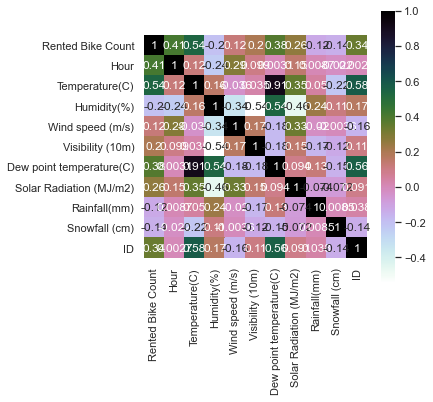

In [11]:
corr = df1.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

# Converting Date into Date_day,Date_month,Date_year

For example , if The Date = 23/11/2017
Date_day = 23 
Date_month = 11 
Date_year = 2017

In [12]:

df1_train = df1_train.drop(['Date'],axis =1)
df1_train = df1_train.drop(['Seasons'],axis =1)
df1_train = df1_train.drop(['Holiday'],axis =1)
df1_train = df1_train.drop(['Functioning Day'],axis =1)

df1_test = df1_test.drop(['Date'],axis =1)
df1_test = df1_test.drop(['Seasons'],axis =1)
df1_test = df1_test.drop(['Holiday'],axis =1)
df1_test = df1_test.drop(['Functioning Day'],axis =1)






In [13]:
df1_train.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,5


In [14]:
df1_test.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
1460,72,20,-1.5,91,1.7,270,-2.7,0.0,0.0,3.3,1461
1461,60,21,-1.6,91,1.3,508,-2.8,0.0,1.5,3.5,1462
1462,73,22,-1.7,85,1.2,1006,-3.8,0.0,0.0,3.5,1463
1463,62,23,-1.7,83,1.0,1093,-4.2,0.0,0.0,3.5,1464
1464,69,0,-1.7,83,0.8,1113,-4.2,0.0,0.0,3.5,1465


In [15]:
df1_test.dtypes

Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
ID                            int64
dtype: object

In [16]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1_train, test_size=0.25)

In [17]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [18]:
train_y

20      426
1109     58
1036     47
504     196
732     209
       ... 
1329    187
1353    149
1270    170
857     446
1007    119
Name: Rented Bike Count, Length: 1095, dtype: int64

In [19]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (1095, 10)
Dimension of train_y dataframe: (1095,)
Dimension of val_x dataframe: (365, 10)
Dimension of val_y dataframe: (365,)


In [20]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y) 

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(val_y, df_pred))
print('Mean Square Error of linear regression:', mean_squared_error(val_y, df_pred))
print('R_Squared Score of linear regression:', r2_score(val_y, df_pred))

Mean Absolute Error of linear regression: 93.83855558986387
Mean Square Error of linear regression: 17896.54187007214
R_Squared Score of linear regression: 0.3014827327720131


In [22]:
predic_test = ln_reg.predict(val_x)
predic_test

array([180.55617881, 268.72469955, 270.36824721, 189.32284131,
       324.03246852, 289.6980057 , 205.53709053, 203.85717469,
       212.62952387, 280.6415553 , 229.56384804, 245.33443957,
       264.75210498, 239.43922833, 302.09738753, 176.91861959,
       378.97328405, 328.90203443, 300.91302988, 300.99251475,
       213.37348076,  76.95713626, 102.33438687, 271.49069033,
       122.86199607, 338.57771753, 299.11324583, 367.61280027,
       124.69693972, 318.24568384, 210.18773266,  76.35006437,
       235.02855157, 302.7656814 , 362.04623133, 313.20317176,
       308.47280487, 192.06514121, 225.53739598,  63.40288186,
       166.68109256, 291.27479943, 206.8598443 , 156.18312151,
       236.02233786, 124.96920779, 210.75051466, 339.12567348,
       311.06935802, 247.09388995, 181.27193867, 162.89270638,
       231.34939995, 207.39722914, 252.10646401, 238.3171336 ,
        55.56474716, 358.24264284, 100.15346227,  62.28415038,
       256.09961893, 231.81351081, 328.13841468,  45.53

In [23]:
test_labels = df1_test[['Rented Bike Count']]
df1_test = df1_test.drop(['Rented Bike Count'],axis = 1)
display(df1_test)
display(test_labels)




,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
1460,20,-1.5,91,1.7,270,-2.7,0.0,0.0,3.3,1461
1461,21,-1.6,91,1.3,508,-2.8,0.0,1.5,3.5,1462
1462,22,-1.7,85,1.2,1006,-3.8,0.0,0.0,3.5,1463
1463,23,-1.7,83,1.0,1093,-4.2,0.0,0.0,3.5,1464
1464,0,-1.7,83,0.8,1113,-4.2,0.0,0.0,3.5,1465
...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,8756
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,8757
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,8758
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,8759


,Rented Bike Count
1460,72
1461,60
1462,73
1463,62
1464,69
...,...
8755,1003
8756,764
8757,694
8758,712


In [24]:
df1_train

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
1455,173,15,-1.6,55,2.5,1891,-9.4,0.64,0.0,0.0,1456
1456,94,16,-2.2,76,1.7,233,-5.8,0.25,0.0,0.0,1457
1457,53,17,-2.4,85,0.3,174,-4.5,0.06,0.0,0.6,1458
1458,100,18,-2.3,91,0.4,202,-3.5,0.00,1.4,2.0,1459


In [25]:
df1_test

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),ID
1460,20,-1.5,91,1.7,270,-2.7,0.0,0.0,3.3,1461
1461,21,-1.6,91,1.3,508,-2.8,0.0,1.5,3.5,1462
1462,22,-1.7,85,1.2,1006,-3.8,0.0,0.0,3.5,1463
1463,23,-1.7,83,1.0,1093,-4.2,0.0,0.0,3.5,1464
1464,0,-1.7,83,0.8,1113,-4.2,0.0,0.0,3.5,1465
...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,8756
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,8757
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,8758
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,8759


In [26]:
predic_test = ln_reg.predict(df1_test)


submission_data = pd.DataFrame({'Original Bike Count':test_labels['Rented Bike Count'],'Predicted Bike Count':predic_test})
display(submission_data.head(5))
val_y = pd.DataFrame(val_y)
val_y['Predicted'] = submission_data['Predicted Bike Count']

,Original Bike Count,Predicted Bike Count
1460,72,63.660810
1461,60,22.094313
1462,73,81.003594
1463,62,92.128980
1464,69,-43.814872
